In [2]:
import matplotlib.pyplot as plt
import numpy as np

x_test = np.array([i*0.1 for i in range(1,101)]) # defining an array of size 100 of number between 0 and 10
f = 2 * np.cos(x_test) + 4 ## calculating the real values of f(x) and storing it in a numpy array

In [3]:
def plot_func(x,fs:list):
    """Plot the list of f(x) agains the variable x
        Parameters:
            x(np.array or list) : the variables to be ploted
            fs(list(np.array)) : list of output variables to be ploted against x
    """
    plt.figure(figsize=(15,10))
    for f in fs:
        plt.plot(x,f)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

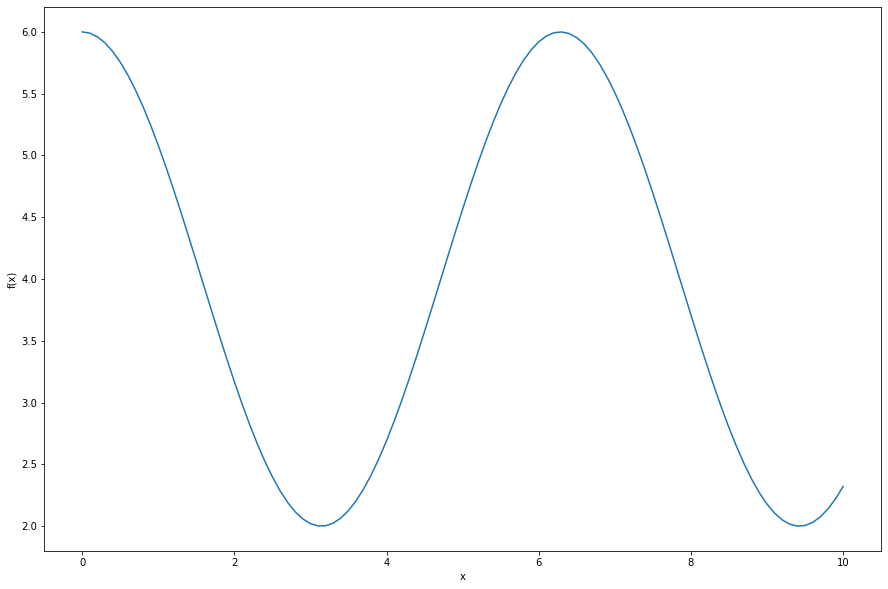

In [67]:
plot_func(x_test,[f])

les elements de X_test present dans x :  0


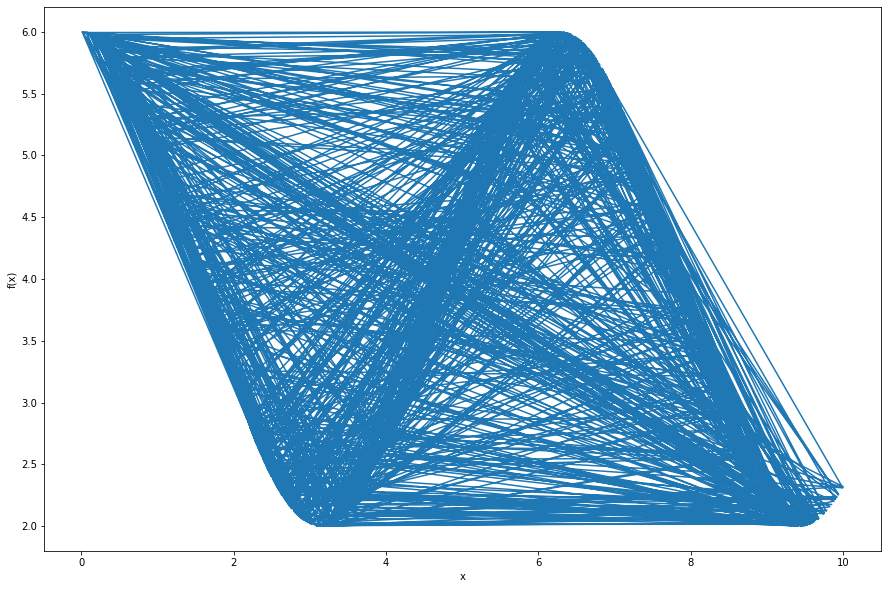

In [17]:
from random import randrange, uniform

x = np.array([uniform(0,10) for i in range(1000)])
x = x[~np.isin(x,x_test)] ## Removing x_test from the x so I don't train the model on the test data
holders = [x_t in x for x_t in x_test]
print("les elements de X_test present dans x : ",sum(holders))
y = 2 * np.cos(x) + 4

plot_func(x,[y]) ##

In [51]:
# Reshaping the variables
x = x.reshape((len(x), 1)) 
y = y.reshape((len(y), 1))
x_test = x_test.reshape((len(x_test), 1))

In [53]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

## This part is Optional to run

## Im using GridSearchCV here to search for the best parameters to use


mlp = MLPRegressor()
param_list = {"max_iter":[4000],"hidden_layer_sizes": [(20,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
gscv_cls = GridSearchCV(mlp, param_list, cv=5,n_jobs=-1)
gscv_cls.fit(x,y.ravel())
print(gscv_cls.best_params_)
print(gscv_cls.best_estimator_)
accuracy = gscv_cls.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print("=====================================")

{'activation': 'tanh', 'alpha': 0.0005, 'hidden_layer_sizes': (50,), 'max_iter': 4000, 'solver': 'adam'}
MLPRegressor(activation='tanh', alpha=0.0005, hidden_layer_sizes=(50,),
             max_iter=4000)
Accuracy for our training dataset with tuning is : 45.62%


In [54]:
regr = MLPRegressor(activation='tanh', alpha=0.0005, hidden_layer_sizes=(50,),max_iter=4000).fit(x, y.ravel())
predicted_func = regr.predict(x_test)

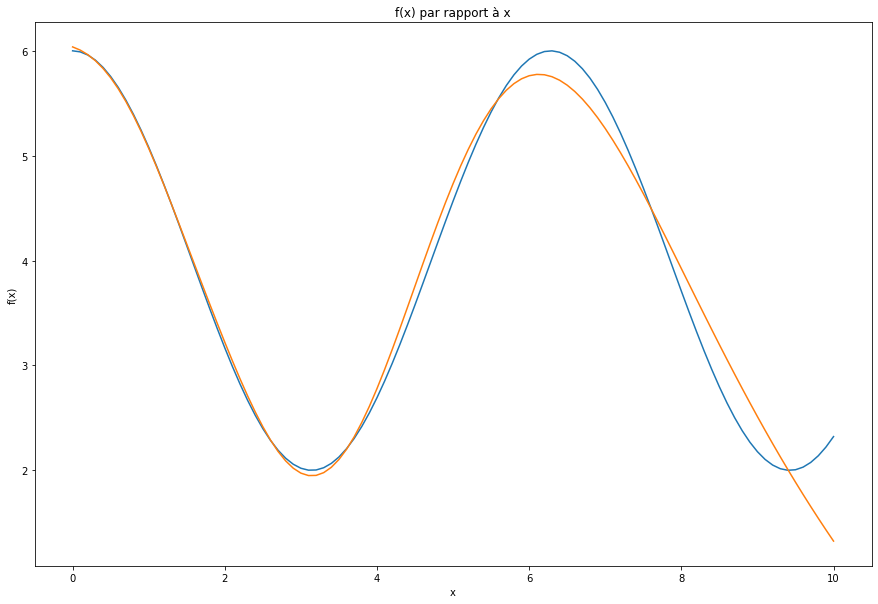

In [55]:
plot_func(x_test,[f,predicted_func])